## Black Friday - Data Pre-processing & Visualization

### Pre-Processing Data and Visualization 
> My main activity using the Black Friday dataset has been *Data Pre-processing* and getting insight through *Visualization*.


### Description
> The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products.<br>
> __Black Friday__ is an informal name for the Friday following Thanksgiving Day in the United States, which is celebrated on the fourth Thursday of November. The day after Thanksgiving has been regarded as the beginning of America's Christmas shopping season since 1952, although the term "Black Friday" didn't become widely used until more recent decades. Black Friday date in 2018 fell on November 23. (Source : Wikipedia)

> __Additional Use of data__ <br>
Additionally the data can also be considered for 'Classification', as several variables are categorical, like classifying the age group and category of goods purchased.
'Clustering' can also be incorporated from the dataset, providing different clusters based on product category, age, Gender.<br>

> __Dataset Features Overview__ <br>
> __User_ID:__ A distinct ID is given to the customers to identify them uniquely.<br>
> __Product_ID:__ A distinct ID is given to products to identify them uniquely.<br>
> __Gender:__ M or F can be used as a binary variable.<br>
> __Age:__ Age is given in bins with 6 categories.<br>
> __Occupation:__ The type of occupation a user does, it is already masked.<br>
> __City_Category:__ The category of the city out of A, B, C. Should be used as Categorical Variable.<br>
> __Stay_In_Current_City_Years:__ It has 5 values: 0, 1, 2, 3, 4+ and may be used as categorical variables.<br>
> __Marital_Status:__ 0: Unmarried and 1: Married. It is expected that marital status does affect the Purchase value.<br>
> __Product_Category_1:__ The primary category that a product belongs to. It can be a useful feature as some certain category of products are sold more often than others.<br>
> __Product_Category_2:__ The Secondary category of a product. If there is no secondary category this will be Null.<br>
> __Product_Category_3:__ The Tertiary Category of a product. This will be only occupied when Category 1 and 2 are occupied. Also, if a product does not have a tertiary category, it will be Null.<br>
> __Purchase:__ This is the target variable.

### Contents
[1.0 Importing required Python libraries and data](#1.0-Importing-required-libraries-and-data)<br>
    [1.1 Exploring the data](#1.1-Exploring-the-data)<br>
<br>
[2.0 Data Pre-Processing](#2.0-Data-Pre-Processing)<br>
    [2.1 Renaming columns](#2.1-Rename-columns)<br>
    [2.2 Encoding categorical variables](#2.2-Encoding-categorical-varaibles-to-numerics)<br>
    [2.3 Handling Missing Values](#2.3-Handling-Missing-Values)<br>
    [2.4 Multicolinearity](#2.4-Multicolinearity)<br>
<br>
[3.0 Visualization](#3.0-Visualization)<br>
   [3.1 Visualisation of correlation](#3.2-Visualization-of-correlation)<br>
<br>
[4.0 Conclusion](#4.0-Conclusion)


### 1.0 Importing required libraries and data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os #The OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.
import numpy as np #NumPy is a general-purpose array-processing package
import pandas as pd #Pandas is an open-source Python Library for data structures processing
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

In [ ]:
# Importing data into python from the given csv file
dataset= pd.read_csv('/content/drive/MyDrive/BlackFriday.csv')

***

#### 1.1 Exploring the data 

In [ ]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


*Observation* <br>
Data contains missing values (NaN) mainly in *'product category2 and 3'* columns

In [ ]:
dataset.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [ ]:
dataset.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

*Observation* <br>
Most of the columns are *'numeric* except 5 columns 

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


*Observation* <br>
Missing data in Product_Category_2 and Product_Category_3 columns

---

### 2.0 Data Pre-Processing

__Activity__

After exploring the given data I could think of the following pre-processing activities <br> 
that can be carried out on the data, to ensure that it is ready for Machine Learning

1. Rename column names : Rename the column names to short names without space, so that it would be easy for coding
2. Encode category varaibles to numerics, so that the data can be used for any kind of Machine Learning
3. Handling missing values : Check whether Product_ID is correlated to Product Categories and fill in appropriate values
4. Explore Multicolinearity

#### 2.1 Rename columns

In [ ]:
#Get Dataset Columns
dataset.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
#Rename Dateset Columns
dataset.columns = ['UserID', 'ProductID', 'Gender', 'Age', 'Occupation', 'CityCategory',
       'StayYearsCity', 'MaritalStatus', 'ProdCat1',
       'ProdCat2', 'ProdCat3', 'Purchase']

In [ ]:
#show New Columns
dataset.columns

Index(['UserID', 'ProductID', 'Gender', 'Age', 'Occupation', 'CityCategory',
       'StayYearsCity', 'MaritalStatus', 'ProdCat1', 'ProdCat2', 'ProdCat3',
       'Purchase'],
      dtype='object')

In [ ]:
# Replacing 0s and 1s in the Marital status column with the appropriate strings
dataset['MaritalStatus'] = dataset['MaritalStatus'].replace(0, 'Unmarried')
dataset['MaritalStatus'] = dataset['MaritalStatus'].replace(1, 'Married')
dataset['MaritalStatus'].head()

0    Unmarried
1    Unmarried
2    Unmarried
3    Unmarried
4    Unmarried
Name: MaritalStatus, dtype: object

In [ ]:
dataset['MaritalStatus'].unique()

array(['Unmarried', 'Married'], dtype=object)

__Create copy of dataset 'before encoding'__
> Creating a copy of the dataset before encoding the values <br>
This is mainly done to use the values for 'visualization' purpose, with actual values

In [ ]:
#Create Copy of Dataset
dataset_orig = dataset.copy()

#### 2.2 Encoding categorical varaibles to numerics

In [ ]:
# Importing required package
from sklearn.preprocessing import LabelEncoder
encode_x = LabelEncoder()

In [ ]:
dataset.head()

,UserID,ProductID,Gender,Age,Occupation,CityCategory,StayYearsCity,MaritalStatus,ProdCat1,ProdCat2,ProdCat3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,NaN,NaN,7969


In [ ]:
# Encoding columns using Label Encoding
dataset['ProductID'] = encode_x.fit_transform(dataset['ProductID'])
dataset['Age'] = encode_x.fit_transform(dataset['Age'])
dataset['CityCategory'] = encode_x.fit_transform(dataset['CityCategory'])
#dataset['MaritalStatus'] = encode_x.fit_transform(dataset['MaritalStatus'])

#Encoding Columns using Label Mapping
#map_dict = {'A': 10, 'B': 15}
# then we will use dictionary map_dict to map Object data type to int8
#dataset['CityCategory'] = dataset['Gender'].map(map_dict)

In [ ]:
dataset.head()

,UserID,ProductID,Gender,Age,Occupation,CityCategory,StayYearsCity,MaritalStatus,ProdCat1,ProdCat2,ProdCat3,Purchase
0,1000001,670,F,0,10,0,2,Unmarried,3,NaN,NaN,8370
1,1000001,2374,F,0,10,0,2,Unmarried,1,6.0,14.0,15200
2,1000001,850,F,0,10,0,2,Unmarried,12,NaN,NaN,1422
3,1000001,826,F,0,10,0,2,Unmarried,12,14.0,NaN,1057
4,1000002,2732,M,6,16,2,4+,Unmarried,8,NaN,NaN,7969


In [ ]:
#create Dummy Variables for Male and Female   ,drop_first=True
y=pd.get_dummies(dataset['Gender'], prefix='Gender')
y.head()

,Gender_F,Gender_M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
dataset=pd.concat([dataset,pd.get_dummies(dataset['Gender'],prefix='Gender',drop_first=True)],axis=1)   
dataset.drop(['Gender'],axis=1, inplace=True)
dataset.head()
#c.head();

,UserID,ProductID,Age,Occupation,CityCategory,StayYearsCity,MaritalStatus,ProdCat1,ProdCat2,ProdCat3,Purchase,Gender_M
0,1000001,670,0,10,0,2,Unmarried,3,NaN,NaN,8370,0
1,1000001,2374,0,10,0,2,Unmarried,1,6.0,14.0,15200,0
2,1000001,850,0,10,0,2,Unmarried,12,NaN,NaN,1422,0
3,1000001,826,0,10,0,2,Unmarried,12,14.0,NaN,1057,0
4,1000002,2732,6,16,2,4+,Unmarried,8,NaN,NaN,7969,1


In [ ]:
dataset.head()

In [ ]:
dataset.StayYearsCity.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
# Replacing '4+' years of with numerical number 4 
dataset['StayYearsCity'] = dataset['StayYearsCity'].replace('4+', 4)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         537577 non-null  int64  
 1   ProductID      537577 non-null  int64  
 2   Age            537577 non-null  int64  
 3   Occupation     537577 non-null  int64  
 4   CityCategory   537577 non-null  int64  
 5   StayYearsCity  537577 non-null  object 
 6   MaritalStatus  537577 non-null  object 
 7   ProdCat1       537577 non-null  int64  
 8   ProdCat2       370591 non-null  float64
 9   ProdCat3       164278 non-null  float64
 10  Purchase       537577 non-null  int64  
 11  Gender_F       537577 non-null  uint8  
 12  Gender_M       537577 non-null  uint8  
dtypes: float64(2), int64(7), object(2), uint8(2)
memory usage: 46.1+ MB


In [ ]:
# Converting StayYearsCity from object to integer
dataset['StayYearsCity'] = dataset['StayYearsCity'].astype(str).astype('int64')
dataset['Gender_F'] = dataset['Gender_F'].astype(str).astype('int64')
dataset['Gender_M'] = dataset['Gender_M'].astype(str).astype('int64')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         537577 non-null  int64  
 1   ProductID      537577 non-null  int32  
 2   Age            537577 non-null  int32  
 3   Occupation     537577 non-null  int64  
 4   CityCategory   537577 non-null  int32  
 5   StayYearsCity  537577 non-null  int64  
 6   MaritalStatus  537577 non-null  int32  
 7   ProdCat1       537577 non-null  int64  
 8   ProdCat2       370591 non-null  float64
 9   ProdCat3       164278 non-null  float64
 10  Purchase       537577 non-null  int64  
 11  Gender_F       537577 non-null  int64  
 12  Gender_M       537577 non-null  int64  
dtypes: float64(2), int32(4), int64(7)
memory usage: 45.1 MB


#### 2.3 Handling Missing Values

Examining __whether Product Category 2 and 3 are correlated__ to the __Product ID__

In [ ]:
# Creating list of index 'without' null values on column ProdCat2
no_null_list1 = dataset[~dataset['ProdCat2'].isnull()].index.tolist()


In [ ]:
dataset['ProductID'][no_null_list1].corr(dataset['ProdCat2'][no_null_list1])

0.01414284133575158

In [ ]:
# Creating list of index 'without' null values on column ProdCat2
no_null_list2 = dataset[~dataset['ProdCat3'].isnull()].index.tolist()

In [ ]:
dataset['ProductID'][no_null_list2].corr(dataset['ProdCat3'][no_null_list2])

0.027218212772966405

__Observation__ : <br>
From the correlation function, it can be concluded that the 'Product ID' is __NOT correlated__ to <br>
either ProdCat2 or ProdCat3

In [ ]:
print("Missing Product Category2 values :", len(dataset)-len(no_null_list1))
print("Missing Product Category3 values :", len(dataset)-len(no_null_list2))

Missing Product Category2 values : 166986
Missing Product Category3 values : 373299


In [ ]:
# Checking values contained in ProdCat2 and ProdCat3
dataset['ProdCat2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
dataset['ProdCat3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

__Conclusion__ : <br>
 It appears that the values in ProdCat2 and ProdCat3 are numeric categories. <br>
 Hence, replacing the 'NaN' with 0s and can be assumed as 'missing' category value.

In [ ]:
#mean foreach age  (Mean Encoding)
c=dataset['Purchase'].groupby(dataset['Age']).mean().to_dict()
dataset['Age']=dataset['Age'].map(c)
dataset.head()

,UserID,ProductID,Age,Occupation,CityCategory,StayYearsCity,MaritalStatus,ProdCat1,ProdCat2,ProdCat3,Purchase,Gender_F,Gender_M
0,1000001,670,9020.126878,10,0,2,1,3,0.0,0.0,8370,1,0
1,1000001,2374,9020.126878,10,0,2,1,1,6.0,14.0,15200,1,0
2,1000001,850,9020.126878,10,0,2,1,12,0.0,0.0,1422,1,0
3,1000001,826,9020.126878,10,0,2,1,12,14.0,0.0,1057,1,0
4,1000002,2732,9453.898579,16,2,4,1,8,0.0,0.0,7969,0,1


In [ ]:
dataset['ProdCat2'].fillna(value=0,inplace=True) # or dataset['ProdCat2'].mode()
dataset['ProdCat3'].fillna(value=0,inplace=True) #or  dataset['ProdCat2'].median()

In [ ]:
dataset['ProdCat2'].unique()

array([ 0.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
# Recheck for missing values (NaN) in the dataset
dataset.isna().any()

UserID           False
ProductID        False
Gender           False
Age              False
Occupation       False
CityCategory     False
StayYearsCity    False
MaritalStatus    False
ProdCat1         False
ProdCat2         False
ProdCat3         False
Purchase         False
dtype: bool

#### 2.4 Multicolinearity

In [ ]:
dataset.corr()

,UserID,ProductID,Age,Occupation,CityCategory,ProdCat1,ProdCat2,ProdCat3,Purchase
UserID,1.000000,-0.017500,0.033359,-0.023024,0.024107,0.003687,0.001471,0.004045,0.005389
ProductID,-0.017500,1.000000,0.022528,0.007309,0.001422,0.026077,0.014143,0.027218,-0.086541
Age,0.033359,0.022528,1.000000,0.091898,0.122308,0.061951,0.054762,0.057155,0.017717
Occupation,-0.023024,0.007309,0.091898,1.000000,0.033781,-0.008114,-0.000031,0.013452,0.021104
CityCategory,0.024107,0.001422,0.122308,0.033781,1.000000,-0.027444,-0.012120,-0.002672,0.068507
ProdCat1,0.003687,0.026077,0.061951,-0.008114,-0.027444,1.000000,0.540423,0.229490,-0.314125
ProdCat2,0.001471,0.014143,0.054762,-0.000031,-0.012120,0.540423,1.000000,0.543544,-0.209973
ProdCat3,0.004045,0.027218,0.057155,0.013452,-0.002672,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,-0.086541,0.017717,0.021104,0.068507,-0.314125,-0.209973,-0.022257,1.000000


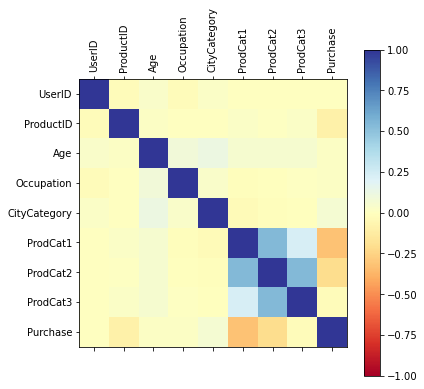

In [ ]:
'''Show a correlation matrix for all features.'''
columns = dataset.select_dtypes(include=['float64','int64','int32','uint8']).columns
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none',cmap='RdYlBu')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(len(columns)))
ax.set_xticklabels(columns, rotation = 90)
ax.set_yticklabels(columns)
plt.show() 

### 3.0 Visualization

Let us visualize the plots based on the categorical variables, 
1. Gender
2. Age
3. Occupation 
4. City Category

In [ ]:
# Obtaining categorical data in terms of Percentage for each column 
group_1 = dataset_orig.groupby(['Gender'])
group_2 = dataset_orig.groupby(["Age"])
group_3 = dataset_orig.groupby(["CityCategory"])
group_4 = dataset_orig.groupby(["Occupation"])

print (group_1[['Purchase']].count()/len(dataset_orig)*100, end="\n\n\n\n")
print (group_2[['Purchase']].count()/len(dataset_orig)*100, end="\n\n\n\n")
print (group_3[['Purchase']].count()/len(dataset_orig)*100, end="\n\n\n\n")
print (group_4[['Purchase']].count()/len(dataset_orig)*100, end="\n\n\n\n")


         Purchase
Gender           
F       24.591268
M       75.408732



        Purchase
Age             
0-17    2.735794
18-25  18.161863
26-35  39.936604
36-45  19.996949
46-50   8.282720
51-55   6.997695
55+     3.888373



               Purchase
CityCategory           
A             26.905541
B             42.132197
C             30.962262



             Purchase
Occupation           
0           12.671673
1            8.551519
2            4.807683
3            3.230421
4           13.181740
5            2.229448
6            3.687286
7           10.753064
8            0.283494
9            1.144580
10           2.348129
11           2.109093
12           5.659282
13           1.404078
14           4.968963
15           2.197267
16           4.611432
17           7.271516
18           1.213780
19           1.553638
20           6.121914





Visualization :  __By count__  

<ipython-input-22-2e98cc66d206>:27: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(city_count, labels=city_lab,explode=expl1, shadow=True, autopct='%1.1f%%')


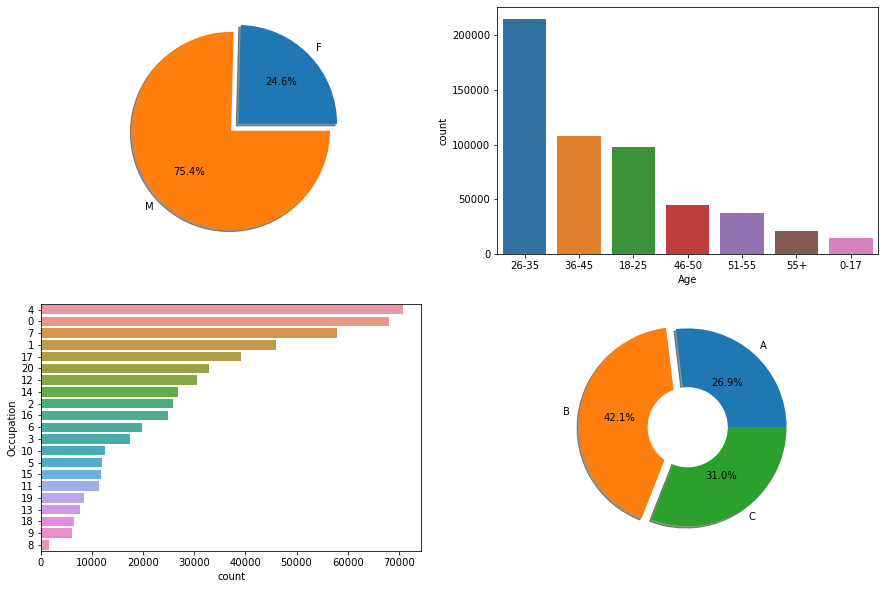

In [ ]:
plt.figure(figsize=(15,10))

# Pie chart for gender distribution
plt.subplot(2,2,1)
gender_count = [dataset_orig.Gender[dataset_orig['Gender']=='F'].count(),
                dataset_orig.Gender[dataset_orig['Gender']=='M'].count()]
gender_lab = dataset_orig.Gender.unique()
expl = (0.1,0)
plt.pie(gender_count, labels=gender_lab, explode=expl, shadow=True , autopct='%1.1f%%');

# Bar chart for Age
plt.subplot(2,2,2)
ordr =dataset_orig.groupby(["Age"]).count().sort_values(by='Purchase',ascending=False).index
sns.countplot(dataset_orig['Age'], label=True, order=ordr)

# Bar chart for Occupation
plt.subplot(2,2,3)
ordr1 =dataset_orig.groupby(["Occupation"]).count().sort_values(by='Purchase',ascending=False).index
sns.countplot(y=dataset_orig['Occupation'], label=True, order=ordr1)

# Donut chart for City Category
plt.subplot(2,2,4)
city_count = group_3[['Purchase']].count().values.tolist()
city_lab = dataset_orig.groupby(["CityCategory"]).count().index.values
my_circle = plt.Circle( (0,0), 0.4, color='white')
expl1 = (0,0.1,0)
plt.pie(city_count, labels=city_lab,explode=expl1, shadow=True, autopct='%1.1f%%')
plt.gcf().gca().add_artist(my_circle)


plt.show()

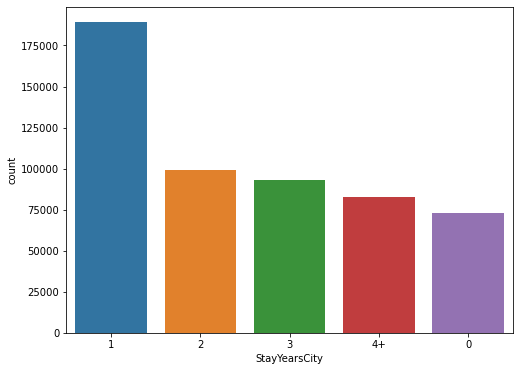

In [ ]:
plt.figure(figsize=(8,6))
ordr2 =dataset_orig.groupby(["StayYearsCity"]).count().sort_values(by='Purchase',ascending=False).index
sns.countplot(dataset_orig['StayYearsCity'], label=True, order=ordr2)
plt.show()

__Observations__ : 

1. There are __75.4% males__ and 24.6% female buyers from the store
2. The majority __(40%) of buyers__ are in between the __age group of 26-35__
3. Major buyers are from the __City category C (31%) and B (42%)__
4. __Occupation__ code __4 (13%), 0 (12.7%) and 7(10.8%)__ are the major buyers
5. It can be observed that, as people __who are new__ in the the current city, they tend to visit the mall more frequently.

Visualization - __more insights__ <br>

1. Combining __Age and Gender__  and also  __Gender and Marital Status__ 
2. Combining __Gender and Marital Status__ to create new column indicating both Gender and Marital status

In [ ]:
#Creating new column in the dataset 
dataset_orig['Gender_MaritalStatus'] = dataset_orig.apply(lambda x:'%s_%s' % (x['Gender'],x['MaritalStatus']),axis=1)

In [ ]:
dataset_orig.Gender_MaritalStatus.unique()

array(['F_Unmarried', 'M_Unmarried', 'M_Married', 'F_Married'],
      dtype=object)

In [ ]:
group_5 = dataset_orig.groupby(["Gender_MaritalStatus"])

<ipython-input-27-7a150d3f819a>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(count1, labels=lab1,explode=expl2, shadow=True, autopct='%1.1f%%')


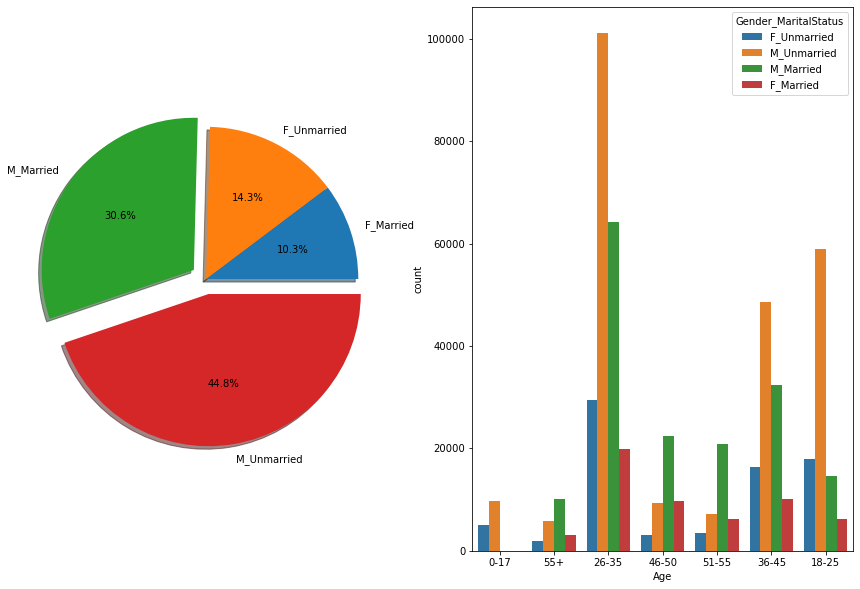

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
count1 = group_5[['Purchase']].count().values.tolist()
lab1 = dataset_orig.groupby(["Gender_MaritalStatus"]).count().index.values
expl2 = (0,0,0.1,0.1)
plt.pie(count1, labels=lab1,explode=expl2, shadow=True, autopct='%1.1f%%')

plt.subplot(1,2,2)
sns.countplot(dataset_orig['Age'],hue=dataset_orig['Gender_MaritalStatus'])

plt.show()

__Observations__ : 
1. Males (un-married and married) between the age group of 26-35 are major buyers
2. Un-married female buyers are more in number than married ones

Visualization :  __By Average Purchase__  

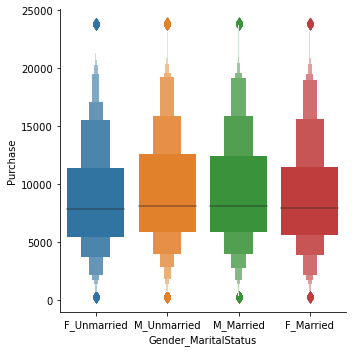

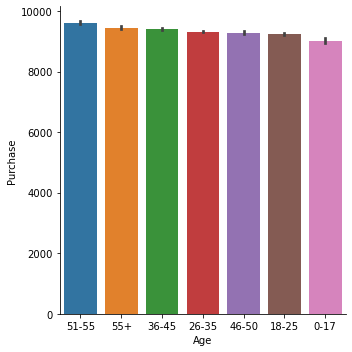

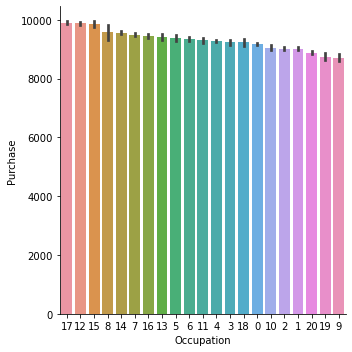

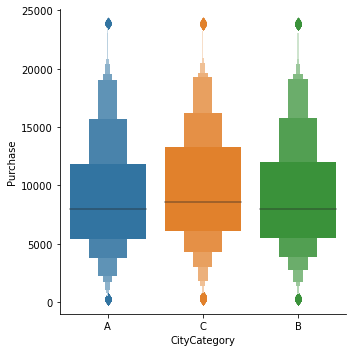

In [ ]:
# Bar chart for Age

sns.catplot(x='Gender_MaritalStatus', y='Purchase', data=dataset_orig, kind='boxen')

ordr_occ =dataset_orig.groupby(["Age"]).mean().sort_values(by='Purchase',ascending=False).index
sns.catplot(x='Age', y='Purchase', order=ordr_occ, data=dataset_orig, kind='bar')

ordr_occ =dataset_orig.groupby(["Occupation"]).mean().sort_values(by='Purchase',ascending=False).index
sns.catplot(x='Occupation', y='Purchase', order=ordr_occ, data=dataset_orig, kind='bar')

sns.catplot(x='CityCategory', y='Purchase', data=dataset_orig, kind='boxen')


plt.show()

__Observations__ : 
1. __Males__ spend more than females
2. Age factor : People who have earned more (*spend more time working*) and have saved enough money, tend to spend more
3. __Occupation codes 17, 12 and 15__ appears to be earning more and accordingly spend more 
4. People living in __Category C__ city appears to spend more in the mall


#### 3.2 Visualization of correlation


In [ ]:
corrmat = dataset.corr()

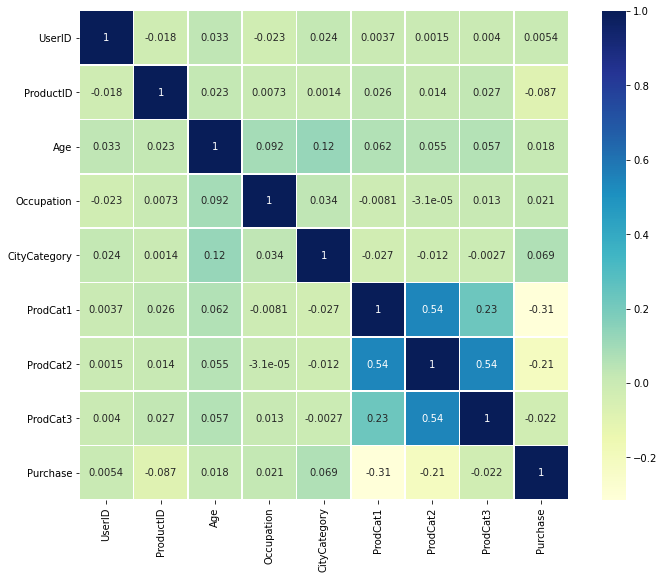

In [ ]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, cmap="YlGnBu", square=True,linewidths=.5, annot=True)
plt.show()

In [ ]:
dataset[dataset.columns[0:]].corr()['Purchase'].sort_values(ascending=False)

Purchase        1.000000
CityCategory    0.068507
Occupation      0.021104
Age             0.017717
UserID          0.005389
ProdCat3       -0.022257
ProductID      -0.086541
ProdCat2       -0.209973
ProdCat1       -0.314125
Name: Purchase, dtype: float64

In [ ]:
# Obtaining top K columns which affects the Purchase the most
k= 8
corrmat.nlargest(k, 'Purchase')

,UserID,ProductID,Age,Occupation,CityCategory,ProdCat1,ProdCat2,ProdCat3,Purchase
Purchase,0.005389,-0.086541,0.017717,0.021104,0.068507,-0.314125,-0.209973,-0.022257,1.000000
CityCategory,0.024107,0.001422,0.122308,0.033781,1.000000,-0.027444,-0.012120,-0.002672,0.068507
Occupation,-0.023024,0.007309,0.091898,1.000000,0.033781,-0.008114,-0.000031,0.013452,0.021104
Age,0.033359,0.022528,1.000000,0.091898,0.122308,0.061951,0.054762,0.057155,0.017717
UserID,1.000000,-0.017500,0.033359,-0.023024,0.024107,0.003687,0.001471,0.004045,0.005389
ProdCat3,0.004045,0.027218,0.057155,0.013452,-0.002672,0.229490,0.543544,1.000000,-0.022257
ProductID,-0.017500,1.000000,0.022528,0.007309,0.001422,0.026077,0.014143,0.027218,-0.086541
ProdCat2,0.001471,0.014143,0.054762,-0.000031,-0.012120,0.540423,1.000000,0.543544,-0.209973


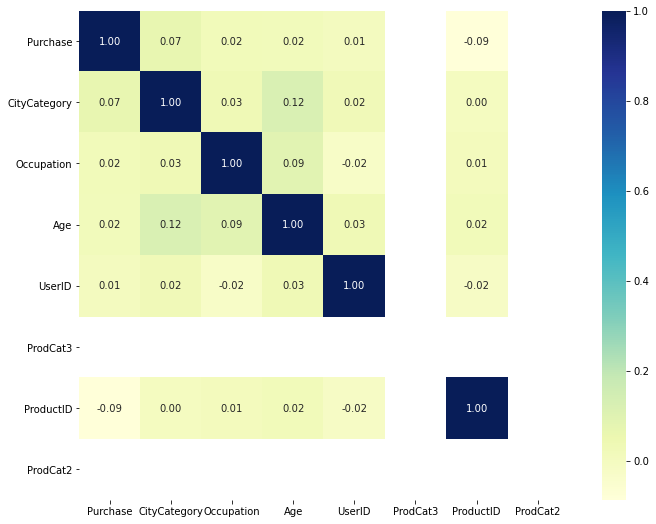

In [ ]:
# Replotting the heatmap with the above data
cols = corrmat.nlargest(k, 'Purchase')['Purchase'].index
cm = np.corrcoef(dataset[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

__Observation__ :
From the above correlation matrix and plot we understand that the __Gender, CityCategory and Product Category 3__ are the three (3) main parameters relating to the Purchase 

### 4.0 Conclusion

1. Based on the above visualizations and correlation matrix, it appears that the __customer purchase behaviour__ mainly depends on __4 major factors__ ; <br>
    a. __City Category__ (Category C and B are more in number and spend more on items)<br> 
    b. __Gender__ (Males (esp. unmarried) buy more than females) <br>
    c. __Occupation__ (codes 4,0,7 are regular buyers, codes 17,12,15 spend more on items) <br>
    d. People __Aged__ between 26-35 visit more and also spend more more on items <br>
2. By observing the dataset, it appears that column Product Category 1 is the 'main' category type and other 2 columns indicating  Product categories (2 & 3) are sub categories of the product. As there were quite a few missing values in Product category2 and Product Category3 (replaced by 0s) no particular insight can be provided.